# Data Preprocessing & Cleaning

# The problems that the dataset have
* Change the names to lower case and use _ instead of white space
* Price has the currency. Convert from object to int and use consistant currency
* Location has a strange sample `Â»`.
* Material and Manfucturing have a lot of missing data.
* Year Built has 0 values, not null. Convert to datetime
* Type column can be split into condition and fuel
* Material and Type has a few unique values, so we can convert it to category

## Import libraries and Dataset

In [137]:
# Declare variables
DATA_PATH = r"C:\Users\PC\DataCamp\Nautical_Boat_website\nautical_boat_website\data\raw\boat_data.csv"
DATA_LINK = "https://s3.amazonaws.com/talent-assets.datacamp.com/boat_data.csv"
EXPROT_PATH = r"C:\Users\PC\DataCamp\Nautical_Boat_website\nautical_boat_website\data\processed\boat_data_cleaned.pkl"

CUR = ['CHF', 'EUR', 'DKK', 'Â£']
CUR_CONV = {'CHF':1.02, 'EUR':1, 'DKK':.13, 'Â£':1.18} 

UNCORRECT_TYPES = ['Unleaded', 'Diesel','Electric']

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_df = pd.read_csv(DATA_PATH)

## Problem 1:
Change the names to lower case and use _ instead of white space

In [4]:
raw_df.columns = raw_df.columns.str.lower().str.replace(" ","_")
raw_df.rename(columns={'number_of_views_last_7_days':"views"},inplace=True)
raw_df.columns

Index(['price', 'boat_type', 'manufacturer', 'type', 'year_built', 'length',
       'width', 'material', 'location', 'views'],
      dtype='object')

## Problem 2:
`price` has currency in the data field, so we have to separate the `currency` and `price_amount` then convert it into a consistant price in euros.

In [5]:
# Split the Price column to currency and price int
raw_df[["currency","price_amount"]] = raw_df.price.str.split(" ",expand=True)
raw_df[["currency","price_amount"]].head()

,currency,price_amount
0,CHF,3337
1,EUR,3490
2,CHF,3770
3,DKK,25900
4,EUR,3399


In [6]:
# Find the currency used in the website
raw_df.currency.unique()

# store it in the CUR variable

array(['CHF', 'EUR', 'DKK', 'Â£'], dtype=object)

In [7]:
# Make the price uniform 
raw_df.price_amount = raw_df.price_amount.astype(int)
raw_df["price_eur"] = raw_df.apply(lambda x : CUR_CONV[x["currency"]] * x["price_amount"], axis=1)
raw_df[["price","price_amount","price_eur"]].head()

,price,price_amount,price_eur
0,CHF 3337,3337,3403.74
1,EUR 3490,3490,3490.00
2,CHF 3770,3770,3845.40
3,DKK 25900,25900,3367.00
4,EUR 3399,3399,3399.00


In [8]:
# Drop the price, price amount and currency columns
raw_df.drop(labels=['price','currency', 'price_amount'],axis=1,inplace=True)
raw_df.columns

Index(['boat_type', 'manufacturer', 'type', 'year_built', 'length', 'width',
       'material', 'location', 'views', 'price_eur'],
      dtype='object')

In [9]:
# Put the price_eur column in the first 
raw_df.set_index(raw_df.columns[-1], inplace=True)
raw_df.reset_index(inplace=True)
raw_df.head()

,price_eur,boat_type,manufacturer,type,year_built,length,width,material,location,views
0,3403.74,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,3490.00,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,3845.40,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,3367.00,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,3399.00,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


## Problem 3:
`location` has a strange sample Â».

In [10]:
# Split the location column to country and location
raw_df[["country","waterway"]]= raw_df.location.str.split("Â»",expand=True).iloc[:,:2]

In [11]:
# cheak
display(raw_df.head(1))

# check null value
raw_df[["country","waterway"]].isna().sum()

,price_eur,boat_type,manufacturer,type,year_built,length,width,material,location,views,country,waterway
0,3403.74,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.0,1.9,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,Switzerland,Lake Geneva


country      36
waterway    943
dtype: int64

## Problem 4:
`material` and `manufacturer` have a lot of missing data

In [12]:
# See the number of null value 
raw_df[["manufacturer","material"]].isna().sum()

manufacturer    1338
material        1749
dtype: int64

In [13]:
# change missing for Manfucturing & Material to not defined
raw_df.fillna(value={"manufacturer":"not defined","material":"not defined"},inplace=True)

In [14]:
# Check
raw_df[["manufacturer","material"]].isna().sum()

manufacturer    0
material        0
dtype: int64

## Problem 5:
`year_built` has 0 values, not null.\
Convert to datetime

In [15]:
# Get the number of zero values 
raw_df.query("year_built == 0").year_built.count()

551

In [16]:
# Set the zero years value to nan
raw_df.year_built.replace(to_replace=0,
                value=np.nan,
                inplace=True)

In [17]:
# Check
raw_df.year_built.isna().sum()

551

In [18]:
# Convert year_built to datetime 
raw_df.year_built = pd.to_datetime(raw_df.year_built,format="%Y")

In [19]:
# Check
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price_eur     9888 non-null   float64       
 1   boat_type     9888 non-null   object        
 2   manufacturer  9888 non-null   object        
 3   type          9882 non-null   object        
 4   year_built    9337 non-null   datetime64[ns]
 5   length        9879 non-null   float64       
 6   width         9832 non-null   float64       
 7   material      9888 non-null   object        
 8   location      9852 non-null   object        
 9   views         9888 non-null   int64         
 10  country       9852 non-null   object        
 11  waterway      8945 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 927.1+ KB


## Problem 6:
`type` column can be split into condition and fuel.

<AxesSubplot:>

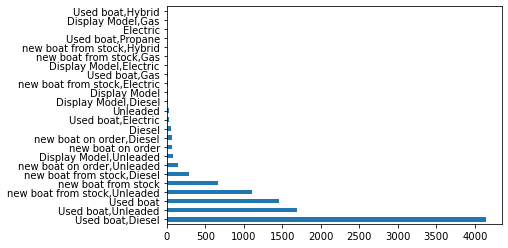

In [20]:
# plote the different types
raw_df.type.value_counts().plot(kind="barh")

In [23]:
# We can separete the type column to condition and fuel with these categories
COND = ['new boat from stock', 'Used boat', 'new boat on order', 'Display Model',"not defined"]
FUEL = ['Unleaded', 'Electric', 'Diesel', 'Gas', 'Hybrid','Propane',"not defined"]
UNCORRECT_TYPES = ['Unleaded', 'Diesel','Electric']

In [114]:
# To spereate the type column 

# Create a different data frame with only the type col seperate to condition and fuel
df = raw_df.type.str.split(",",expand=True).rename(columns={0:"condition",1:"fuel"})

# get the index in the condition col with wrong values 
index = df.query("condition in @UNCORRECT_TYPES").index 

# get the value in the wrong condition to swape it with fuel
values = df.query("condition in @UNCORRECT_TYPES").condition
df.loc[index,"fuel"] = values

# label all the wrong condition and nall fuel to not defined
df.loc[index,"condition"] = "not defined"
df.fuel.fillna(value="not defined",inplace=True)

In [118]:
# drop the type column and insert the condition and fuel cols
raw_df.drop(columns="type",inplace=True)
raw_df["condition"] = df.condition
raw_df["fuel"] = df.fuel

<AxesSubplot:>

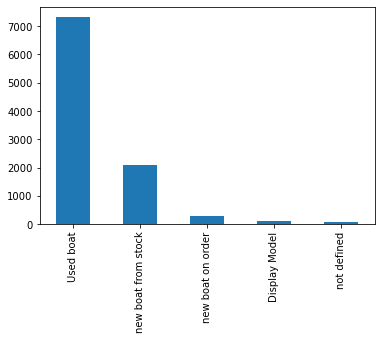

In [121]:
# Check
raw_df.condition.value_counts().plot(kind="bar")

<AxesSubplot:>

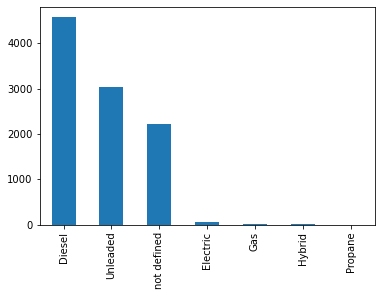

In [122]:
raw_df.fuel.value_counts().plot(kind="bar")

## Problem 7:
`material`, `condition` and `fuel` has a few unique values, so we can convert it to category

In [129]:
# Convert the material, condition and fuel to category dtype
raw_df.material = raw_df.material.astype("category")
raw_df.condition = raw_df.condition.astype("category")
raw_df.fuel = raw_df.fuel.astype("category")

In [131]:
# Check
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price_eur     9888 non-null   float64       
 1   boat_type     9888 non-null   object        
 2   manufacturer  9888 non-null   object        
 3   year_built    9337 non-null   datetime64[ns]
 4   length        9879 non-null   float64       
 5   width         9832 non-null   float64       
 6   material      9888 non-null   category      
 7   location      9852 non-null   object        
 8   views         9888 non-null   int64         
 9   country       9852 non-null   object        
 10  waterway      8945 non-null   object        
 11  condition     9882 non-null   category      
 12  fuel          9888 non-null   category      
dtypes: category(3), datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 802.5+ KB


## Save the cleaned dataset

In [138]:
raw_df.to_pickle(EXPROT_PATH)